In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
df= pd.read_csv("facilities.csv")

In [2]:
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   County              47 non-null     object 
 1   TOTAL               47 non-null     int64  
 2   Male                47 non-null     int64  
 3   Female              47 non-null     int64  
 4   Intersex            47 non-null     int64  
 5   Total               47 non-null     int64  
 6   Conventional        47 non-null     int64  
 7   Group quarters      47 non-null     int64  
 8   Sq Km               47 non-null     float64
 9   Persons per Sq. Km  47 non-null     float64
 10  target facilities   47 non-null     int64  
 11  % completion        47 non-null     object 
dtypes: float64(2), int64(8), object(2)
memory usage: 4.5+ KB
None


In [3]:
print("\nFirst five rows:")
print(df.head())


First five rows:
                County   TOTAL     Male  Female  Intersex   Total  \
0              BARINGO   666763  336322  330428        13  142518   
1                BOMET   875689  434287  441379        23  187641   
2              BUNGOMA  1670570  812146  858389        35  358796   
3                BUSIA   893681  426252  467401        28  198152   
4      ELGEYO/MARAKWET   454480  227317  227151        12   99861   

   Conventional  Group quarters        Sq Km  Persons per Sq. Km  \
0        141877             641  10984.62209           60.699676   
1        187230             411   2507.07622          349.286947   
2        357714            1082   3023.93798          552.448500   
3        197944             208   1699.78361          525.761629   
4         99119             742   3032.05926          149.891529   

   target facilities % completion  
0                296          94%  
1                206          49%  
2                283          90%  
3             

In [4]:
print("\nSummary statistics:")
print(df.describe(include="all"))


Summary statistics:
             County        TOTAL           Male        Female    Intersex  \
count            47  4.700000e+01  4.700000e+01  4.700000e+01   47.000000   
unique           47           NaN           NaN           NaN         NaN   
top         BARINGO           NaN           NaN           NaN         NaN   
freq              1           NaN           NaN           NaN         NaN   
mean            NaN  1.012006e+06  5.010225e+05  5.109514e+05   32.425532   
std             NaN  6.932427e+05  3.423677e+05  3.513158e+05   38.490961   
min             NaN  1.439200e+05  7.610300e+04  6.781300e+04    2.000000   
25%             NaN  6.095050e+05  3.031095e+05  3.112910e+05   18.000000   
50%             NaN  8.936810e+05  4.507410e+05  4.488680e+05   25.000000   
75%             NaN  1.156724e+06  5.699920e+05  5.897590e+05   34.000000   
max             NaN  4.397073e+06  2.192452e+06  2.204376e+06  245.000000   

               Total  Conventional  Group quarters    

In [5]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
County                0
TOTAL                 0
Male                  0
Female                0
Intersex              0
Total                 0
Conventional          0
Group quarters        0
Sq Km                 0
Persons per Sq. Km    0
target facilities     0
% completion          0
dtype: int64


In [8]:
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [9]:
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include=['number']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

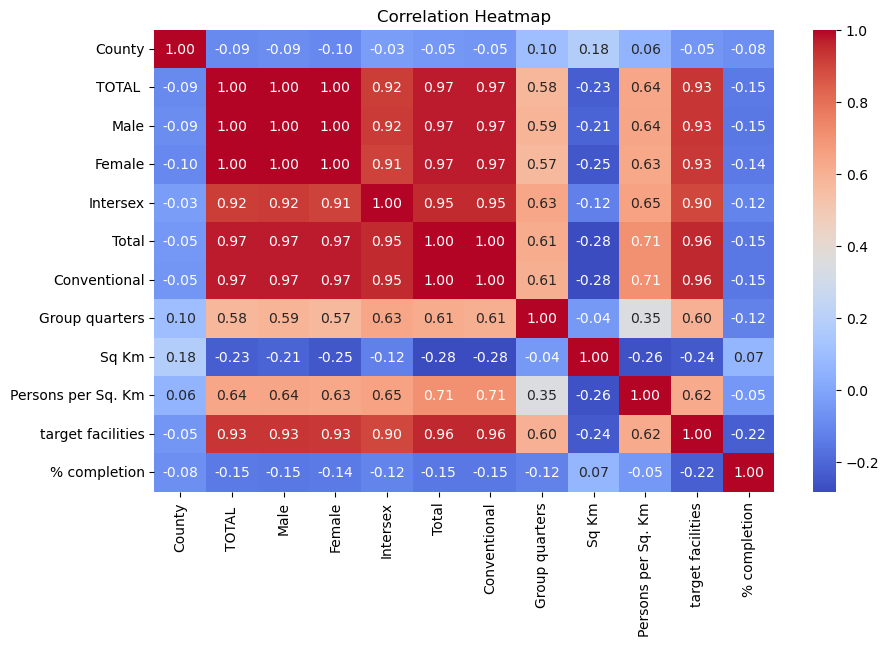

In [10]:
# Data Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

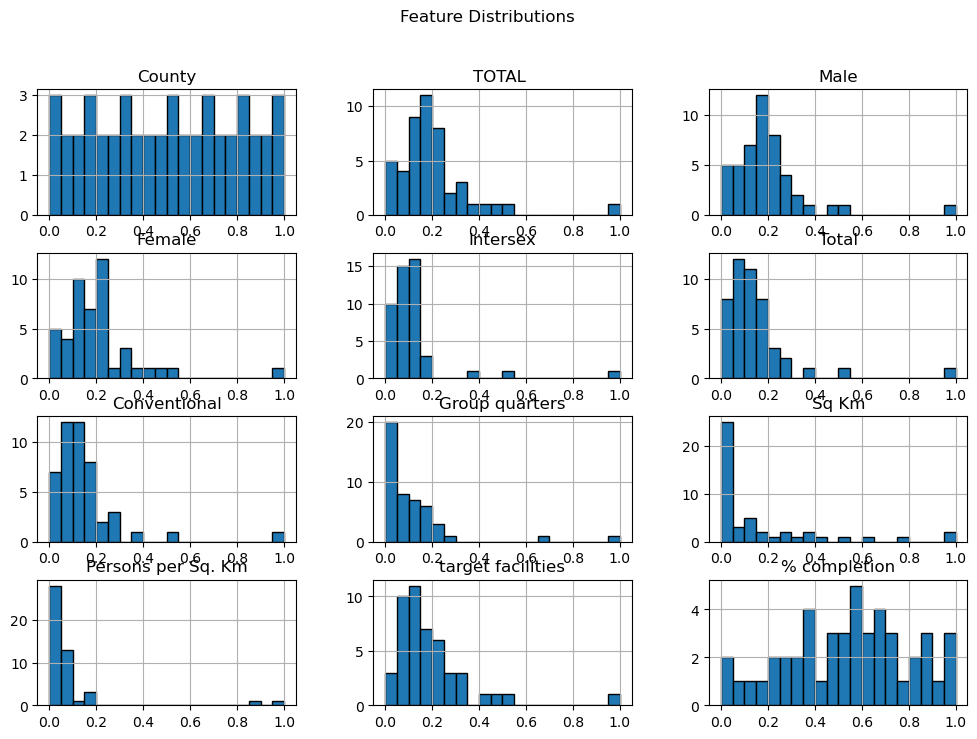

In [11]:
# Visualize distributions of numeric features
df[num_cols].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

In [12]:
# Visualize categorical feature distribution
for col in label_encoders.keys():
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

In [14]:
print("\nProcessed dataset sample:")
print(df.head())


Processed dataset sample:
     County    TOTAL       Male    Female  Intersex     Total  Conventional  \
0  0.000000  0.122931  0.122957  0.122915  0.045267  0.071178      0.073708   
1  0.021739  0.172053  0.169246  0.174844  0.086420  0.101896      0.104762   
2  0.043478  0.358945  0.347789  0.370022  0.135802  0.218413      0.221496   
3  0.065217  0.176284  0.165450  0.187024  0.106996  0.109052      0.112098   
4  0.086957  0.073019  0.071450  0.074577  0.041152  0.042138      0.044430   

   Group quarters     Sq Km  Persons per Sq. Km  target facilities  \
0        0.031807  0.152207            0.008688           0.180288   
1        0.018836  0.032339            0.054932           0.108173   
2        0.056677  0.039647            0.087488           0.169872   
3        0.007388  0.020925            0.083211           0.093750   
4        0.037503  0.039762            0.022981           0.060897   

   % completion  
0      0.826087  
1      0.130435  
2      0.652174  
3    